In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import json

with open("./data/insegcat-1-v2/coco-annotations.json", "r") as file:
    data = json.load(file)

data["annotations"][0]

{'id': 49,
 'image_id': 1,
 'category_id': 2,
 'segmentation': [[861.5,
   686.9,
   808.9,
   667.9,
   768.8,
   561.3,
   768.5,
   549.9,
   826.5,
   572.3,
   899.4,
   606.7,
   964.1,
   720.0,
   906.9,
   720.0]],
 'area': 15119,
 'bbox': [769.0, 550.0, 195.0, 170.0],
 'iscrowd': False,
 'isbbox': False,
 'color': '#bd1333',
 'metadata': {}}

In [33]:
from utils.dataset_utils import (
    get_cadisv2_dataset,
    get_cataract1k_dataset,
    ZEISS_CATEGORIES,
)

dataset_1,_,_ = get_cadisv2_dataset("../../storage/data/CaDISv2", domain_incremental=True)
#dataset_2 = Cataract101Dataset("data/insegcat-1-v2", split="train")

In [55]:
img_1, mask_1 = dataset_1[10]
#img_2, mask_2 = dataset_2[10]

img_1.shape, mask_1.shape, img_1.dtype,mask_1.dtype,torch.unique(mask_1) #img_2.shape, mask_2.shape,

(torch.Size([3, 270, 480]),
 torch.Size([270, 480]),
 torch.float32,
 torch.int32,
 tensor([ 0,  3, 10, 11], dtype=torch.int32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
3
10
11
[0.         0.28627452 0.3882353  0.5372549  0.8352941  0.98039216
 1.        ]


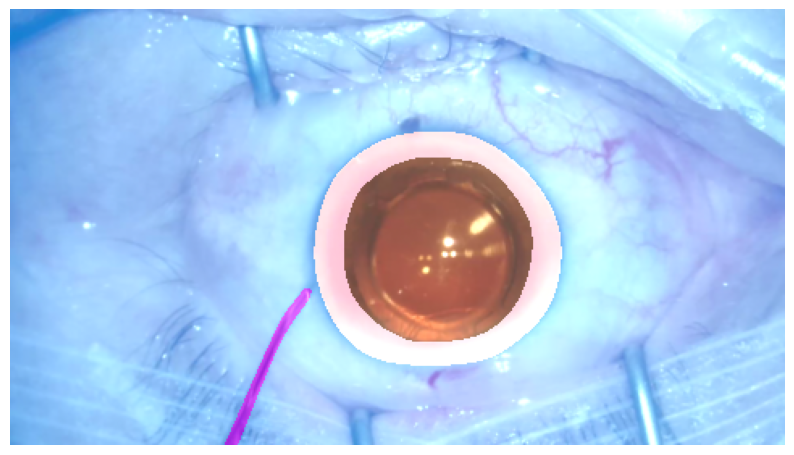

In [53]:
overlay_mask_on_image(img_1,mask_1)

In [56]:
torch.unique(img_1)

tensor([0.0165, 0.0178, 0.0188,  ..., 0.9999, 0.9999, 1.0000])

Video2_frame001960.png


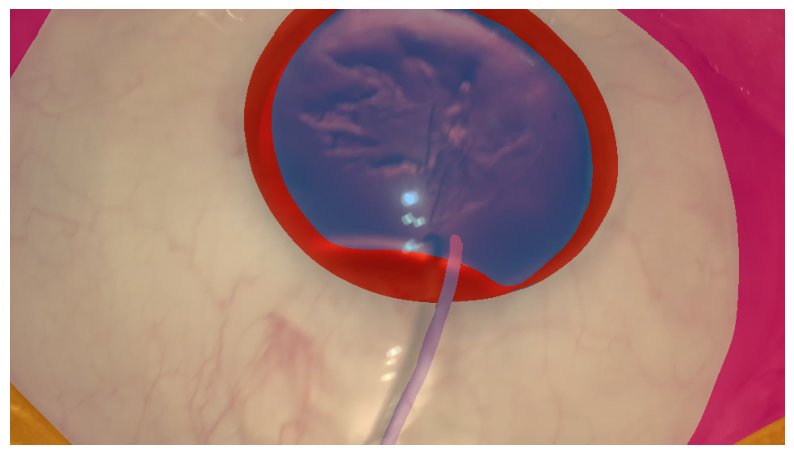

In [82]:
from utils.vis_utils import overlay_mask_on_image, visualize_tensor_image
import numpy as np
from PIL import Image
from torchvision import transforms
import torch
transform = transforms.ToTensor()
file_name="Video2_frame001960.png"
mask_1=Image.open(f"../Video02/Labels/{file_name}")
img_pil=Image.open(f"../Video02/Images/{file_name}")

mask_1 = np.array(mask_1)

# Convert the NumPy array to a PyTorch tensor
mask_tensor = torch.tensor(mask_1,dtype=torch.int32)
                           

img_1 = np.array(img_pil)

# Convert the NumPy array to a PyTorch tensor
img_tensor = transform(img_1)#.permute(2,0,1)
print(file_name)
overlay_mask_on_image(img_tensor, mask_tensor)


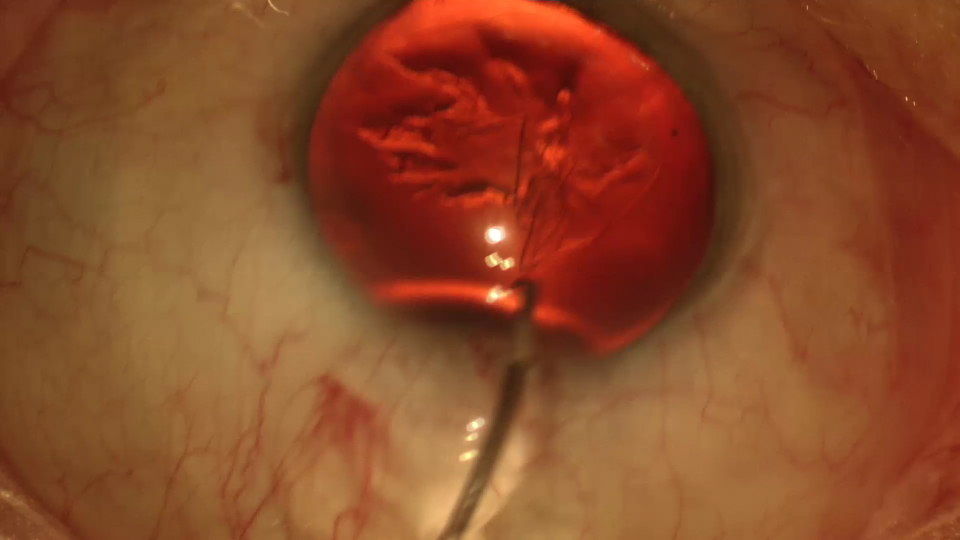

In [83]:
img_pil

In [ ]:

mask_1=Image.open("../Video02/Labels/Video2_frame000800.png")
img_1=Image.open("../Video02/Images/Video2_frame000800.png")


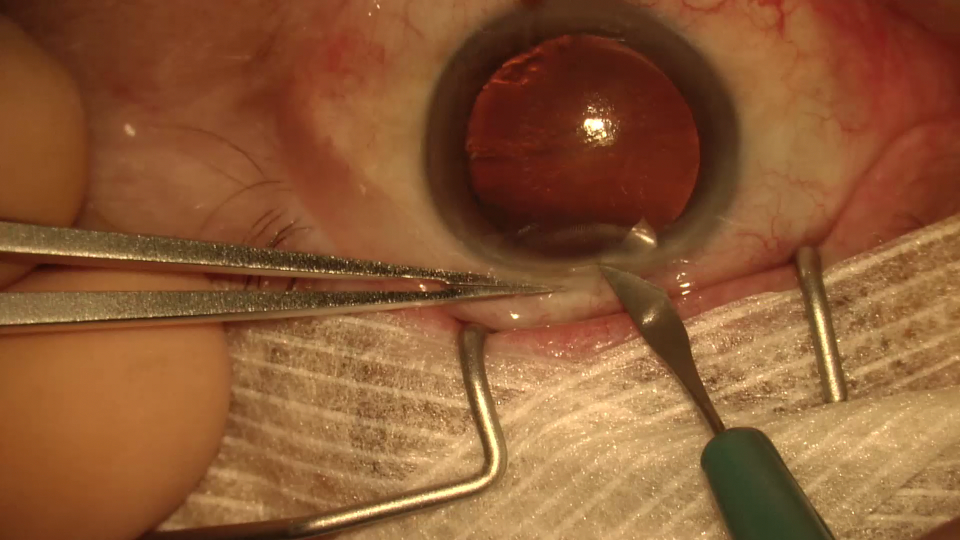

In [15]:
from torchvision.transforms.functional import to_pil_image

to_pil_image(img_1)

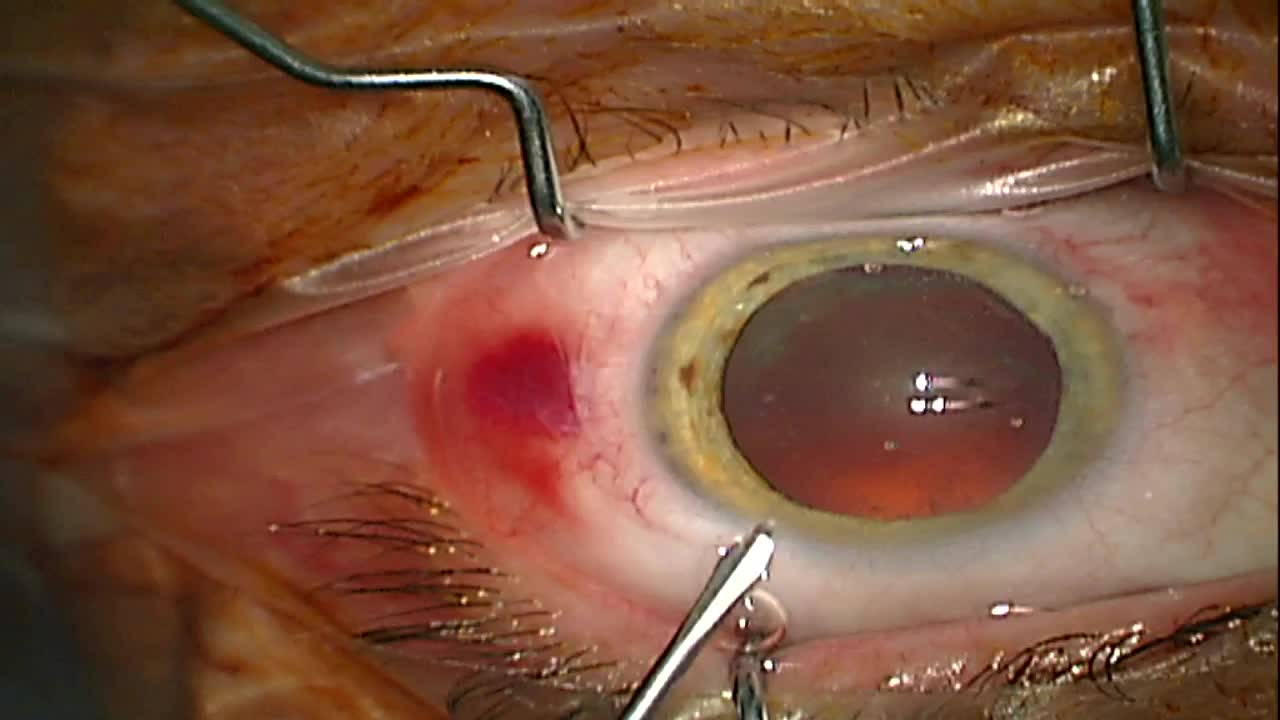

In [16]:
to_pil_image(img_2)

In [31]:
img_tensor.dtype,mask_tensor.dtype

(torch.uint8, torch.uint8)

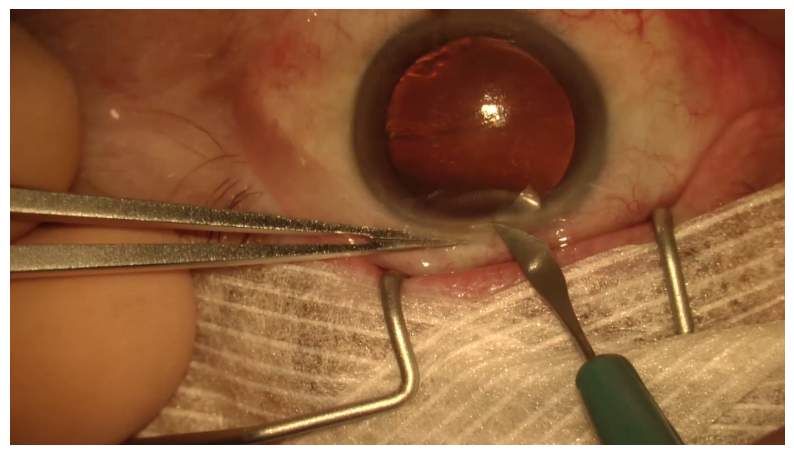

In [18]:
visualize_tensor_image(img_1)